In [ ]:
%matplotlib inline

import scipy
import sys
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/SAT_CT_District_Participation_2012 (1).csv')
df.head()

,District,Participation Rate
0,Ansonia,0.66
1,Avon,0.90
2,Berlin,0.81
3,Bethel,0.86
4,Bloomfield,0.81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            130 non-null    object 
 1   Participation Rate  130 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
df.describe()

,Participation Rate
count,130.000000
mean,0.740538
std,0.136162
min,0.280000
25%,0.662500
50%,0.745000
75%,0.840000
max,1.000000


In [ ]:
meandf=df["Participation Rate"].mean()

In [ ]:
stdvdf=df["Participation Rate"].std(ddof=0)

In [ ]:
print(meandf)
print(stdvdf)

0.7405384615384616
0.13563702432176808


In [ ]:
zs=ss.zscore(df["Participation Rate"],ddof=0)

In [ ]:
df=df.assign(zscore=zs)

In [ ]:
df


,District,Participation Rate,zscore
0,Ansonia,0.66,-0.593779
1,Avon,0.90,1.175649
2,Berlin,0.81,0.512113
3,Bethel,0.86,0.880744
4,Bloomfield,0.81,0.512113
...,...,...,...
125,Stamford Academy,0.28,-3.395374
126,Connecticut Technical High School System,0.49,-1.847124
127,Norwich Free Academy,0.70,-0.298875
128,The Gilbert School,0.71,-0.225148


In [ ]:
def plot_anomaly(score,thres):
  score=score.copy().sort_values(ascending=False).values
  ranks=np.linspace(1,len(score),len(score))
  maskout=(score<thres)

  plt.figure(dpi=150)
  plt.plot(ranks[~maskout],score[~maskout],'o',color='b',label='valid schools')
  plt.plot(ranks[maskout],score[maskout],'o',color='r',label='invalid schools')
  plt.axhline(thres,color='r',label='threshold',alpha=0.5)
  plt.legend(loc="lower left")
  plt.title("Z score vs School districts")
  plt.xlabel('Ranked School Districts')
  plt.ylabel('Z score')
  plt.show()

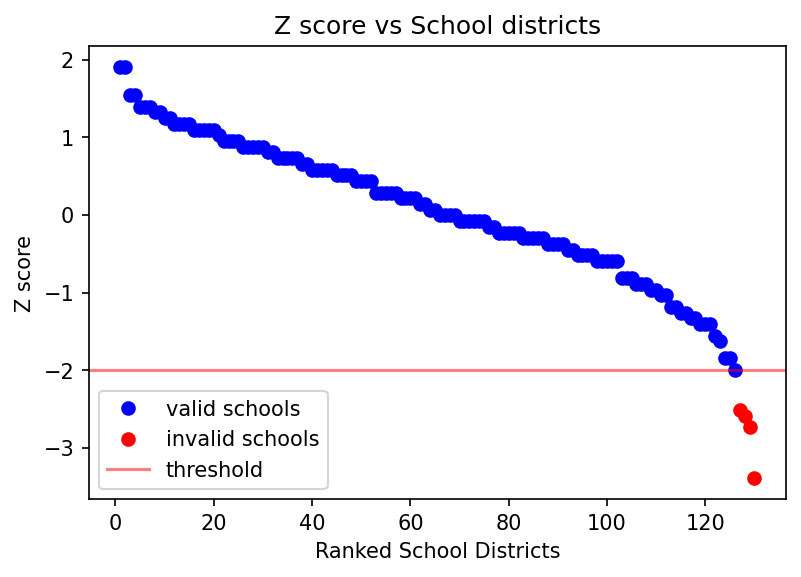

In [ ]:
plot_anomaly(df['zscore'],-2)

In [ ]:
a=df[(df["zscore"]<-2)]
a

,District,Participation Rate,zscore
50,New Britain,0.40,-2.510660
99,Windham,0.37,-2.731839
121,Eastern Connecticut Regional Educational Servi...,0.39,-2.584386
125,Stamford Academy,0.28,-3.395374
